In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
one_day = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/1-Day(s)-forecast-Horizon.csv',index_col='date')
three_days = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/3-Day(s)-forecast-Horizon.csv',index_col='date')
seven_days = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/weather_forecast_data/processed_forecast_historical/7-Day(s)-forecast-Horizon.csv',index_col='date')
eto = pd.read_csv('/content/drive/MyDrive/Universidad/Evapotranspiration-Prediction-2022/data_processing/data/Eto-Rinconada.csv',index_col='Data')


In [62]:
eto.index = pd.to_datetime(eto.index,format='%d-%m-%Y')
eto_1 = eto['Eto']['2021-01-01':'2022-06-01']
eto_3 = eto['Eto']['2021-01-01':'2022-06-04']
eto_7 = eto['Eto']['2021-01-01':'2022-06-08']
one_day = one_day[['tmin','tmax','temp','rh','rhmin','rhmax','wind','cod_wc','ra']]
three_days = three_days[['tmin','tmax','temp','rh','rhmin','rhmax','wind','cod_wc','ra']]
seven_days = seven_days[['tmin','tmax','temp','rh','rhmin','rhmax','wind','cod_wc','ra']]

In [63]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [64]:
from sklearn.metrics import SCORERS

In [25]:
eto_7

Data
2021-01-01    5.68
2021-01-02    5.02
2021-01-03    5.76
2021-01-04    5.65
2021-01-05    5.14
              ... 
2022-06-04    0.65
2022-06-05    1.09
2022-06-06    0.88
2022-06-07    0.81
2022-06-08    0.80
Name: Eto, Length: 524, dtype: float64

In [ ]:
param_list = {"hidden_layer_sizes": [(30,30,30,30),(30,30,30,30,30),(20,20,20,20,20,20),(20,30,20,30,20,30,20)],
              "activation": ["logistic", "tanh", "relu"],
              "solver": ["adam"],
              "alpha": [0.00005,0.0005]}
MLP_gridCV = GridSearchCV(
    estimator=MLPRegressor(max_iter=10000),
    scoring='neg_mean_squared_error',
    param_grid=param_list,
    n_jobs=-1,
    cv=5,
    verbose=5,
)
MLP_gridCV.fit(np.array(one_day[-300:]), np.array(eto[-300:]))

# Prediction
# Y_prediction = MLP_gridCV.predict(X)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [5e-05, 0.0005],
                         'hidden_layer_sizes': [(30, 30, 30, 30),
                                                (30, 30, 30, 30, 30),
                                                (20, 20, 20, 20, 20, 20),
                                                (20, 30, 20, 30, 20, 30, 20)],
                         'solver': ['adam']},
             scoring='neg_mean_squared_error', verbose=5)

In [ ]:
MLP_gridCV.best_params_

{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': (20, 30, 20, 30, 20, 30, 20),
 'solver': 'adam'}

In [ ]:
MLP_gridCV.best_params_

{'activation': 'relu',
 'alpha': 5e-05,
 'hidden_layer_sizes': (20, 30, 20, 30, 20, 30, 20),
 'solver': 'adam'}

In [65]:
X_ = []
y_true = []
y_true_3 = []
y_true_7 = []

y_hat_3 = []
y_hat_7 = []
y_hat = []
for i in range(len(one_day)):
  if (412+i == len(one_day) and 412+i==len(eto_1)):
    break
  else:
    train_data = np.array(one_day[i:412+i])
    train_eto = np.array(eto_1[i:412+i])

    reg = MLPRegressor(alpha=0.00005,hidden_layer_sizes=(30,30,30,30,30),max_iter=10000,activation='relu')
    reg.fit(train_data,train_eto)

    x_test = np.array(one_day[:412+i+1])
    x_test = x_test[-1:]
    x_test_3 = np.array(three_days[:412+i+1])
    x_test_3 = x_test_3[-1:]
    x_test_7 = np.array(seven_days[:412+i+1])
    x_test_7 = x_test_7[-1:]

    y_test = np.array(eto_1[:412+i+1])
    y_test = y_test[-1:]
    y_test_3 = np.array(eto_3[:412+i+3])
    y_test_3 = y_test_3[-1:]
    y_test_7 = np.array(eto_7[:412+i+7])
    y_test_7 = y_test_7[-1:]

    X_.append(x_test)
    y_true.append(y_test)
    y_true_3.append(y_test_3)
    y_true_7.append(y_test_7)

    y_hat.append(reg.predict(x_test))
    y_hat_3.append(reg.predict(x_test_3))
    y_hat_7.append(reg.predict(x_test_7))

In [66]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2_1 = r2_score(y_true,y_hat)
mse_1 = mean_squared_error(y_true,y_hat)
mae_1 = mean_absolute_error(y_true,y_hat)

r2_3 = r2_score(y_true_3,y_hat_3)
mse_3 = mean_squared_error(y_true_3,y_hat_3)
mae_3 = mean_absolute_error(y_true_3,y_hat_3)

r2_7 = r2_score(y_true_7,y_hat_7)
mse_7 = mean_squared_error(y_true_7,y_hat_7)
mae_7 = mean_absolute_error(y_true_7,y_hat_7)

In [71]:
print(r2_7,np.sqrt(mse_7),mae_7)

0.8149618987781585 0.6046319972592816 0.48144759563093914


In [70]:
np.sqrt(mse_7)/np.mean(y_true_7)

0.2346133027059297

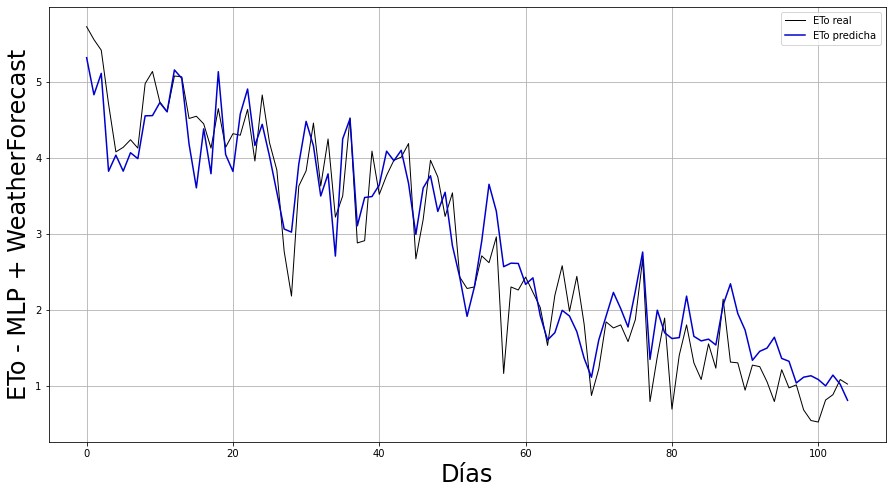

In [68]:
fig = plt.subplots(figsize=[15,8])
plt.grid()
plt.plot(y_true,'-', color = 'black', ms=4, lw=1, alpha=1, label='ETo real')
plt.plot(y_hat,'-', color = 'mediumblue', ms=4, alpha=1, label='ETo predicha',linewidth=1.5)
plt.legend();
plt.xlabel("Días", fontsize=24)
plt.ylabel("ETo - MLP + WeatherForecast", fontsize=24);

In [4]:
def map_range(x, in_min, in_max, out_min, out_max):
  return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min